In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("brianwarner/aircraft-data-from-nov-2022-through-dec-31-2022")

print("Path to dataset files:", path)

Defaulting to user installation because normal site-packages is not writeable
  Using cached kagglehub-0.3.8-py3-none-any.whl (55 kB)
     |████████████████████████████████| 78 kB 2.0 MB/s eta 0:00:01
  Using cached requests-2.32.3-py3-none-any.whl (64 kB)
     |████████████████████████████████| 197 kB 2.5 MB/s eta 0:00:01
     |████████████████████████████████| 128 kB 2.4 MB/s eta 0:00:01
     |████████████████████████████████| 70 kB 2.2 MB/s eta 0:00:01
     |████████████████████████████████| 166 kB 2.4 MB/s eta 0:00:01
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


/Users/tarundamodaran/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Users/tarundamodaran/Library/Python/3.9/lib/python/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: /Users/tarundamodaran/.cache/kagglehub/datasets/brianwarner/aircraft-data-from-nov-2022-through-dec-31-2022/versions/1


In [4]:
import pandas as pd

# Load the dataset
df = pd.read_csv("aircraft-data_nov_dec.csv")

# Display first few rows
print(df.head())


    flight tail_number     long      lat    alt      manufacturer  \
0   SIS300      N300NJ -118.213  34.5823  20175    BOMBARDIER INC   
1  UAL1434      N67501 -117.937  34.6038  36700            BOEING   
2  SWA3287      N483WN -118.035  34.6345  13225            BOEING   
3  AAL2059      N660AW -118.075  34.4643  33750  AIRBUS INDUSTRIE   
4    N84PJ       N84PJ -117.756  34.6002  34725          DASSAULT   

           model reg_expiration              reg_owner     reg_city  \
0    BD-100-1A10        1/31/24   PUNTA PACIFICO I LLC  BAKERSFIELD   
1          737-9        4/30/24    UNITED AIRLINES INC      CHICAGO   
2        737-7H4        8/31/24  SOUTHWEST AIRLINES CO       DALLAS   
3       A320-232        2/29/24     US BANK NA TRUSTEE       BOSTON   
4  FALCON 2000EX       12/31/24    HAMPTON AIRWAYS INC  SELLERSBURG   

       reg_state  squawk  mph        spotted  
0     CALIFORNIA  1077.0  474  11/7/22 13:30  
1       ILLINOIS  7730.0  523  11/7/22 13:30  
2          TEXAS 

In [5]:
# Drop unnecessary columns
df_cleaned = df.drop(columns=["tail_number", "reg_expiration", "reg_owner", "reg_city", "reg_state"])
# Convert 'spotted' to datetime
df_cleaned["spotted"] = pd.to_datetime(df_cleaned["spotted"], format="%m/%d/%y %H:%M")

df_cleaned["flight"].fillna("Unknown", inplace=True)
df_cleaned["manufacturer"].fillna("Unknown", inplace=True)
df_cleaned["model"].fillna("Unknown", inplace=True)
df_cleaned["squawk"].fillna(0, inplace=True)


/var/folders/63/xq0rcby97vjbyhbl3pvr62p80000gn/T/ipykernel_82578/4108286909.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned["flight"].fillna("Unknown", inplace=True)
/var/folders/63/xq0rcby97vjbyhbl3pvr62p80000gn/T/ipykernel_82578/4108286909.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values 

In [8]:
from sklearn.preprocessing import MinMaxScaler

# Initialize scaler
scaler = MinMaxScaler()

# Normalize altitude and speed
df_cleaned[["alt", "mph"]] = scaler.fit_transform(df_cleaned[["alt", "mph"]])


In [9]:
# Save cleaned dataset
df_cleaned.to_csv("cleaned_aircraft_data.csv", index=False)


In [10]:
# Display cleaned data info
df_cleaned.info()

# Show first few rows
print(df_cleaned.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30947 entries, 0 to 30946
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   flight        30947 non-null  object        
 1   long          30947 non-null  float64       
 2   lat           30947 non-null  float64       
 3   alt           30947 non-null  float64       
 4   manufacturer  30947 non-null  object        
 5   model         30947 non-null  object        
 6   squawk        30947 non-null  float64       
 7   mph           30947 non-null  float64       
 8   spotted       30947 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(5), object(3)
memory usage: 2.1+ MB
    flight     long      lat       alt      manufacturer          model  \
0   SIS300 -118.213  34.5823  0.144056    BOMBARDIER INC    BD-100-1A10   
1  UAL1434 -117.937  34.6038  0.279312            BOEING          737-9   
2  SWA3287 -118.035  34.6345  0.087170        

In [13]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Re-extract feature matrix for clustering
features = ["long", "lat", "alt", "mph"]
X = df_cleaned[features]

print(X.head())  # Check if X is correctly loaded
print(X.isnull().sum())  # Check for missing values
print(X.dtypes)  # Check if data types are correct




      long      lat       alt       mph
0 -118.213  34.5823  0.144056  0.731429
1 -117.937  34.6038  0.279312  0.824762
2 -118.035  34.6345  0.087170  0.552381
3 -118.075  34.4643  0.255167  0.832381
4 -117.756  34.6002  0.263147  0.828571
long    0
lat     0
alt     0
mph     0
dtype: int64
long    float64
lat     float64
alt     float64
mph     float64
dtype: object


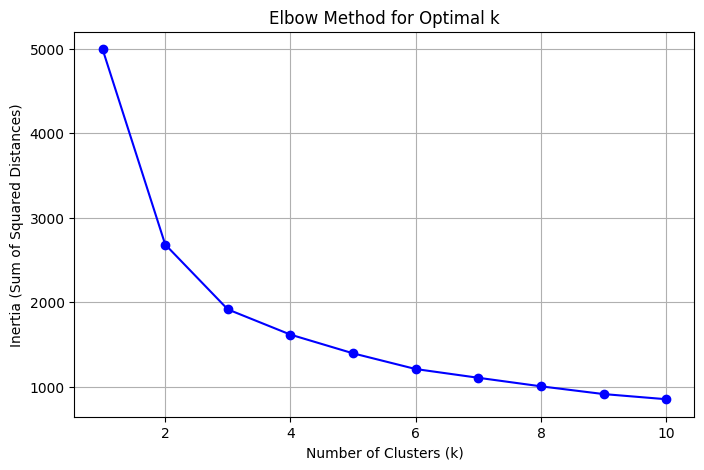

In [14]:
# Use the Elbow Method to find the optimal number of clusters (k)
inertia = []
k_range = range(1, 11)  # Testing k from 1 to 10

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)  # Store the sum of squared distances

# Plot the Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o', linestyle='-', color='b')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia (Sum of Squared Distances)")
plt.title("Elbow Method for Optimal k")
plt.grid(True)
plt.show()


In [30]:
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
labels = kmeans.fit_predict(X)

df_cleaned["cluster"] = labels
df_cleaned.to_csv("cleaned_aircraft_data_with_clusters.csv", index=False)


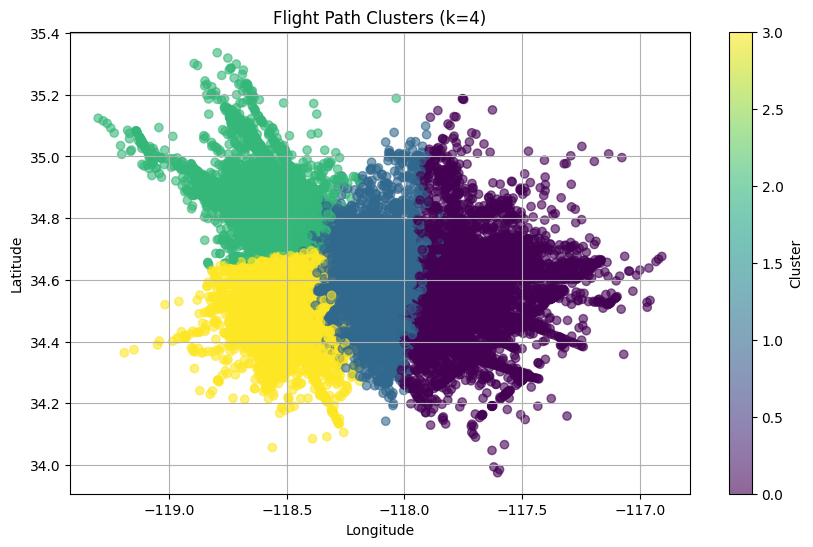

In [17]:
import matplotlib.pyplot as plt

# Scatter plot of clusters using long & lat
plt.figure(figsize=(10, 6))
plt.scatter(df_cleaned["long"], df_cleaned["lat"], c=df_cleaned["cluster"], cmap="viridis", alpha=0.6)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title(f"Flight Path Clusters (k={optimal_k})")
plt.colorbar(label="Cluster")
plt.grid(True)
plt.show()


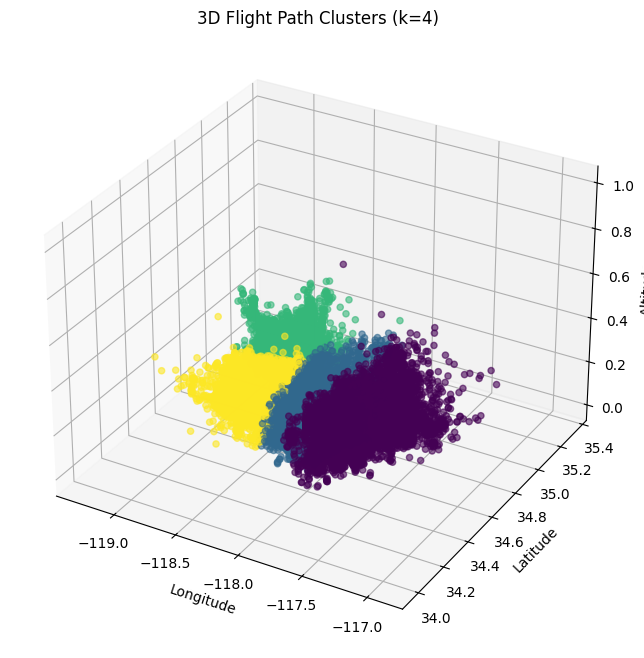

In [27]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(14, 8))
ax = fig.add_subplot(111, projection="3d")

# Scatter plot with altitude
ax.scatter(df_cleaned["long"], df_cleaned["lat"], df_cleaned["alt"], c=df_cleaned["cluster"], cmap="viridis", alpha=0.6)

ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.set_zlabel("Altitude")
ax.set_title(f"3D Flight Path Clusters (k={optimal_k})")

plt.show()


In [25]:
cluster_summary = df_cleaned.groupby("cluster")[["alt", "mph"]].mean()
print(cluster_summary)
cluster_counts = df_cleaned["cluster"].value_counts()
print(cluster_counts)


              alt       mph
cluster                    
0        0.203210  0.740117
1        0.126574  0.664759
2        0.241664  0.768852
3        0.239935  0.766825
cluster
1    13593
0     7984
3     5160
2     4210
Name: count, dtype: int64


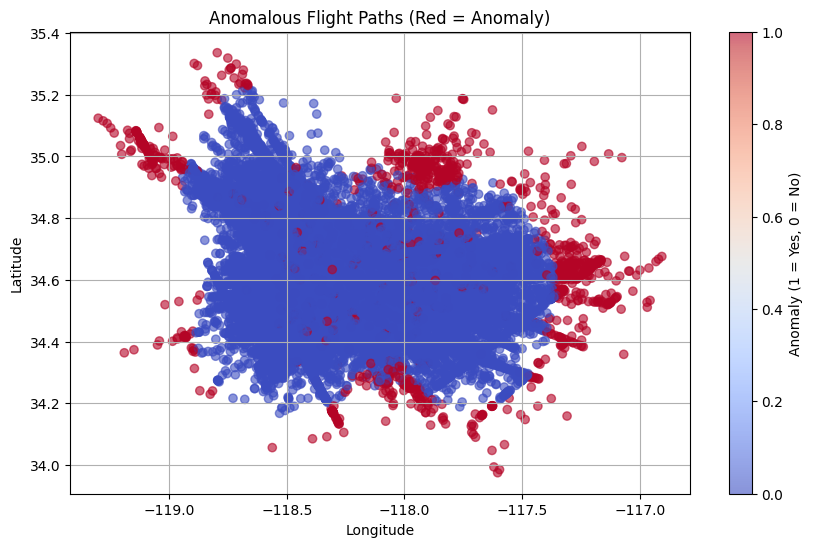

In [26]:
import numpy as np

# Compute distance from each point to its cluster center
distances = np.linalg.norm(X - kmeans.cluster_centers_[df_cleaned["cluster"]], axis=1)

# Define threshold (top 5% farthest points)
threshold = np.percentile(distances, 95)
df_cleaned["anomaly"] = distances > threshold

# Plot Anomalous Flights
plt.figure(figsize=(10, 6))
plt.scatter(df_cleaned["long"], df_cleaned["lat"], c=df_cleaned["anomaly"], cmap="coolwarm", alpha=0.6)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Anomalous Flight Paths (Red = Anomaly)")
plt.colorbar(label="Anomaly (1 = Yes, 0 = No)")
plt.grid(True)
plt.show()


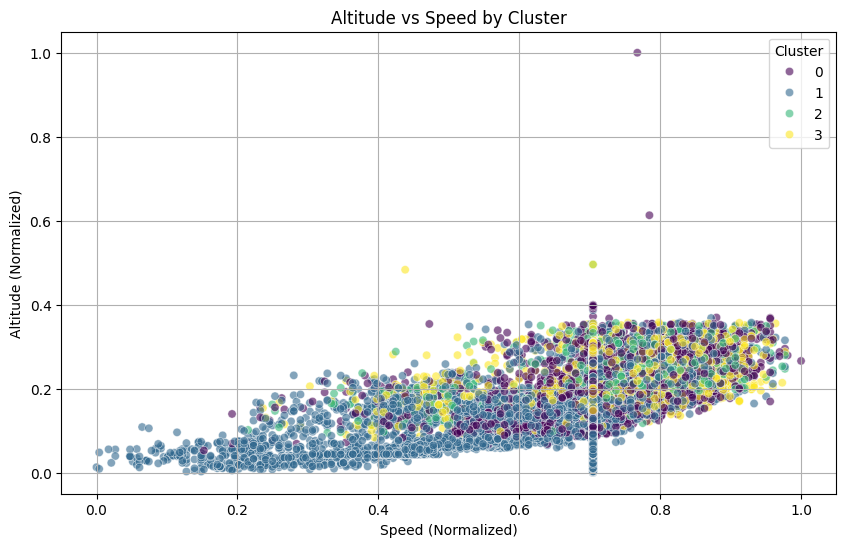

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot: Altitude vs Speed, colored by cluster
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_cleaned, x="mph", y="alt", hue="cluster", palette="viridis", alpha=0.6)
plt.xlabel("Speed (Normalized)")
plt.ylabel("Altitude (Normalized)")
plt.title("Altitude vs Speed by Cluster")
plt.legend(title="Cluster")
plt.grid(True)
plt.show()


/var/folders/63/xq0rcby97vjbyhbl3pvr62p80000gn/T/ipykernel_82578/3504861059.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette="viridis")


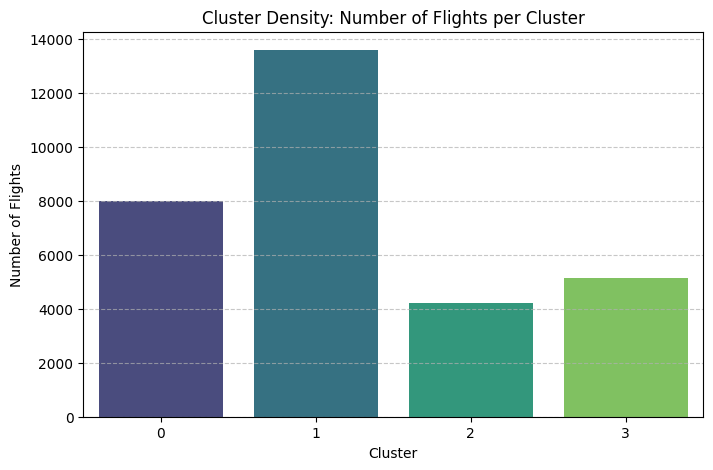

In [34]:
# Analyze cluster density by counting the number of flights in each cluster
cluster_counts = df_cleaned["cluster"].value_counts().sort_index()

# Visualizing the cluster density
plt.figure(figsize=(8, 5))
sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette="viridis")
plt.xlabel("Cluster")
plt.ylabel("Number of Flights")
plt.title("Cluster Density: Number of Flights per Cluster")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [35]:
df_cleaned["spotted"] = pd.to_datetime(df_cleaned["spotted"])
df_cleaned["hour"] = df_cleaned["spotted"].dt.hour  # Extract hour from timestamp


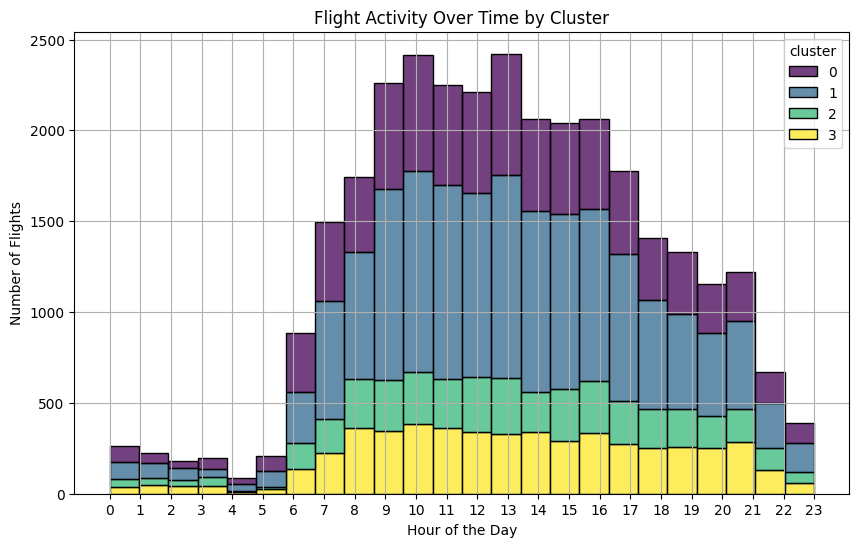

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(data=df_cleaned, x="hour", hue="cluster", multiple="stack", bins=24, palette="viridis")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Flights")
plt.title("Flight Activity Over Time by Cluster")
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()
